In [8]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from skimage.feature import blob_log
from skimage.filters import gaussian
from skimage.data import cells3d
from skimage import filters
import glob
import stackview
import scipy as sp
from napari_segment_blobs_and_things_with_membranes import split_touching_objects
import pyclesperanto as cle
import pandas as pd


(1000, 1000)


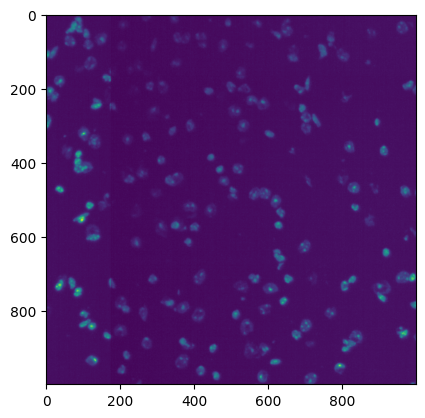

In [9]:
image = ski.io.imread(r"C:\Users\grufl\Desktop\211007 Sicherung USB\uni\Prakt bioinfo\Bioinfo\data\raw\selected-tiles\out_opt_flow_registered_X10_Y10_c01_DAPI.tif")
print(image.shape)
plt.imshow(image)

In [20]:
#Atto_425 = A
#Alexa_488 = G
#Alexa_568 = C
#Alexa_647 = T
image_A = ski.io.imread(r"C:\Users\grufl\Desktop\211007 Sicherung USB\uni\Prakt bioinfo\Bioinfo\data\raw\selected-tiles\out_opt_flow_registered_X10_Y10_c01_Atto_425.tif")
image_G = ski.io.imread(r"C:\Users\grufl\Desktop\211007 Sicherung USB\uni\Prakt bioinfo\Bioinfo\data\raw\selected-tiles\out_opt_flow_registered_X10_Y10_c02_Alexa_488.tif")
image_C = ski.io.imread(r"C:\Users\grufl\Desktop\211007 Sicherung USB\uni\Prakt bioinfo\Bioinfo\data\raw\selected-tiles\out_opt_flow_registered_X10_Y10_c03_Alexa_568.tif")
image_T = ski.io.imread(r"C:\Users\grufl\Desktop\211007 Sicherung USB\uni\Prakt bioinfo\Bioinfo\data\raw\selected-tiles\out_opt_flow_registered_X10_Y10_c04_Alexa_647.tif")
images_barcode = [image_A, image_G, image_C, image_T]

In [22]:
bracode_label_list = []
for image in images_barcode:
        # Apply Gaussian filter to denoise the image
        image_denoised = gaussian(image, sigma=2, preserve_range=True)
        image_binary = image_denoised > ski.filters.threshold_li(image_denoised)
        split_objects = split_touching_objects(image_binary)
        labeled_objects = ski.measure.label(split_objects, connectivity=1)
        filtered_labels = cle.exclude_labels_outside_size_range(labeled_objects, minimum_size=150, maximum_size=2000)
        bracode_label_list.append(filtered_labels)


In [12]:

#15.1
first_file_select = glob.glob(r"C:\Users\grufl\Desktop\211007 Sicherung USB\uni\Prakt bioinfo\Bioinfo\data\raw\selected-tiles\out_opt_flow_registered_X10_Y10_c01_*.tif")
file_select = first_file_select[:4]
images = [ski.io.imread(file) for file in file_select]
image_data = np.stack(images, axis=0)
# Maximum Intensity Projection
mip = np.max(image_data, axis=0)
# labeling von MIP
image_denoised = gaussian(mip, sigma=2, preserve_range=True)
image_binary = image_denoised > ski.filters.threshold_li(image_denoised)
split_objects = split_touching_objects(image_binary)
labeled_objects = ski.measure.label(split_objects, connectivity=1)
mip_filtered_labels = cle.exclude_labels_outside_size_range(labeled_objects, minimum_size=150, maximum_size=2000)
mip_num_features = mip_filtered_labels.max()
print(mip_num_features)

159.0


In [ ]:
#15.2

# If mip_filtered_labels is a pyclesperanto array, convert to numpy:
if hasattr(mip_filtered_labels, "get"):
    mip_filtered_labels_np = mip_filtered_labels.get()
else:
    mip_filtered_labels_np = mip_filtered_labels

# Get region properties
props = ski.measure.regionprops(mip_filtered_labels_np)

# Example: get centroids for each label
centroids = [prop.centroid for prop in props]
#print("Centroids:", centroids)

# Example: get bounding boxes for each label
bboxes = [prop.bbox for prop in props]
print("Bounding boxes:", bboxes)

Bounding boxes: [(4, 321, 24, 347), (7, 633, 26, 666), (8, 901, 28, 920), (10, 876, 32, 891), (14, 193, 40, 231), (14, 959, 32, 981), (21, 333, 36, 350), (24, 938, 37, 959), (26, 622, 69, 665), (30, 949, 59, 982), (31, 859, 47, 885), (39, 134, 58, 155), (42, 860, 68, 901), (52, 425, 71, 439), (55, 144, 71, 159), (57, 349, 83, 382), (66, 123, 88, 151), (69, 405, 96, 424), (71, 456, 104, 494), (75, 187, 101, 216), (92, 783, 122, 815), (99, 739, 120, 753), (113, 121, 144, 138), (114, 344, 145, 369), (118, 798, 142, 821), (120, 101, 150, 119), (120, 230, 154, 247), (121, 250, 142, 267), (138, 511, 162, 533), (175, 42, 199, 52), (177, 489, 195, 505), (184, 0, 223, 14), (186, 238, 204, 252), (193, 275, 218, 292), (210, 19, 225, 36), (222, 538, 248, 575), (223, 573, 269, 592), (230, 593, 252, 614), (238, 263, 291, 307), (243, 488, 297, 515), (253, 517, 266, 533), (258, 701, 288, 718), (282, 512, 322, 528), (282, 720, 297, 736), (287, 694, 303, 707), (292, 535, 318, 550), (300, 87, 323, 122), 

In [15]:
channel_analysis = {}
for box in bboxes:
    best_fit = None
    best_fit_index = None
    min_row, min_col, max_row, max_col = box
    for idx, image in enumerate(images):
        roi = image[min_row:max_row, min_col:max_col]
        roi_mean = roi.mean()
        if best_fit is None:
            best_fit = roi
            best_fit_index = idx
        elif roi_mean > best_fit.mean():
            best_fit = roi
            best_fit_index = idx
    channel_analysis[box] = ("best fit in image index", best_fit_index)
print(channel_analysis)

{(4, 321, 24, 347): ('best fit in image index', 2), (7, 633, 26, 666): ('best fit in image index', 2), (8, 901, 28, 920): ('best fit in image index', 1), (10, 876, 32, 891): ('best fit in image index', 2), (14, 193, 40, 231): ('best fit in image index', 2), (14, 959, 32, 981): ('best fit in image index', 2), (21, 333, 36, 350): ('best fit in image index', 2), (24, 938, 37, 959): ('best fit in image index', 2), (26, 622, 69, 665): ('best fit in image index', 2), (30, 949, 59, 982): ('best fit in image index', 2), (31, 859, 47, 885): ('best fit in image index', 2), (39, 134, 58, 155): ('best fit in image index', 2), (42, 860, 68, 901): ('best fit in image index', 2), (52, 425, 71, 439): ('best fit in image index', 1), (55, 144, 71, 159): ('best fit in image index', 2), (57, 349, 83, 382): ('best fit in image index', 1), (66, 123, 88, 151): ('best fit in image index', 2), (69, 405, 96, 424): ('best fit in image index', 2), (71, 456, 104, 494): ('best fit in image index', 2), (75, 187, 101